In [ ]:
# Plot the True vs Predicted values and the distribution of 
# Log CM Lipid normalized and non-lipid normalized for the PFAS 
# from the master list 

In [411]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np

In [412]:
PFAS = pd.read_csv('df_mordred_PFAS_MasterList.csv')

C:\Users\Adi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (150,151,152,159,160,161,168,169,170,177,178,179,186,187,188,195,196,197,204,205,206,213,214,215,222,223,224,231,232,233,240,241,242,245,246,247,248,249,250,251,252,253,353,354,355,356,357,358,366,367,368,375,376,377,384,385,386,393,394,395,402,403,404,411,412,413,420,421,422,429,430,431,438,439,440,447,448,449,456,457,458,461,462,463,464,465,472,473,474,480,481,482,488,489,490,496,497,498,504,505,506,512,513,514,520,521,522,528,529,530,536,537,538,544,545,546,552,553,554,557,558,559,560,561,568,569,570,576,577,578,584,585,586,592,593,594,600,601,602,608,609,610,616,617,618,624,625,626,632,633,634,640,641,642,648,649,650,653,654,827,828,882,883,898,899,1120,1139,1199,1218,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1294,1297,1299,1589) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, res

In [413]:
PFAS.head()

,DTXSID,PREFERRED_NAME_x,INCHIKEY_x,SMILES_x,MOLECULAR_FORMULA_x,AVERAGE_MASS_x,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,DTXSID80844621,"2,2,3-Trifluoro-3-(pentafluoroethoxy)propanoic...",XEZRGPDPHQWFHV-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)OC(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,9.852247,48.801716,261.987620,14.554868,424,26,80,91,10.659722,3.270833
1,DTXSID00844623,"Fluoro[1,1,2,2-tetrafluoro-2-(trifluoromethoxy...",GHVHGLNEHMMXAV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)OC(F)(F)F,C5H2F8O4,278.054,NaN,NaN,NaN,NaN,...,9.803280,49.832196,277.982534,14.630660,512,24,84,92,10.909722,3.465278
2,DTXSID60844624,Fluoro(heptafluoropropoxy)acetic acid,SOPKUPKNOTUECV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,9.933095,48.927773,261.987620,14.554868,415,27,80,92,10.659722,3.277778
3,DTXSID70845743,Trifluoroacetic acid--8-fluoro-6-[(piperidin-3...,HIRJPQZSAAXQMS-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCCNC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,9.763708,51.101624,246.116841,7.458086,620,26,94,109,4.555556,3.972222
4,DTXSID30845744,Trifluoroacetic acid--8-fluoro-6-[(piperidin-4...,QSVWXQWXIQVXRP-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCNCC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,9.763708,51.101624,246.116841,7.458086,620,26,94,109,4.555556,3.972222


In [414]:
PFAS.columns

Index(['DTXSID', 'PREFERRED_NAME_x', 'INCHIKEY_x', 'SMILES_x',
       'MOLECULAR_FORMULA_x', 'AVERAGE_MASS_x', 'C:M Ratio Master',
       'C:M Ratio Lipid Normalized', 'Log C:M Ratio Lipid Normalized',
       'C:M Ratio Non-Lipid Normalized',
       ...
       'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2',
       'mZagreb1', 'mZagreb2'],
      dtype='object', length=1838)

In [422]:
ANN = pd.read_csv('ANN_plus_ts_PFAS_feature_extract.csv')
RF = pd.read_csv('forestplus_ts_PFAS_feature_extract.csv')
SVM = pd.read_csv('svmdata_ts_PFAS_feature_extract.csv')

In [423]:
ANN.pop('Unnamed: 0')
ANN['mean_pred'] = ANN.mean(axis = 1)
ANN.head()

,predicted_values,predicted_values.1,predicted_values.2,predicted_values.3,predicted_values.4,predicted_values.5,predicted_values.6,predicted_values.7,predicted_values.8,predicted_values.9,...,predicted_values.16,predicted_values.17,predicted_values.18,predicted_values.19,predicted_values.20,predicted_values.21,predicted_values.22,predicted_values.23,predicted_values.24,mean_pred
0,0.641978,0.188025,0.255378,0.319355,0.089066,0.309151,0.244610,0.251558,0.104276,0.195268,...,0.185556,0.336487,0.209707,0.140913,0.164920,0.235548,0.498851,0.165893,0.388257,0.251776
1,0.550293,0.108736,0.259508,0.250910,0.306401,0.636700,0.309038,0.411087,-0.023154,0.205076,...,0.213758,0.398326,0.352552,0.098715,0.132509,0.329081,0.884751,0.110830,0.350704,0.310583
2,0.473531,0.187319,0.215729,0.336253,0.230808,0.452994,0.326478,0.167793,0.008961,0.201523,...,0.188219,0.238069,0.340437,0.139228,0.135288,0.236422,0.401957,0.192027,0.292758,0.247388
3,-0.361263,0.082038,0.012233,-0.118966,-0.193111,-0.161536,-0.683290,-0.072358,-0.260403,-0.369356,...,-0.048950,-0.087994,0.033657,-0.106770,-0.192970,0.152281,-0.491904,-0.003928,-0.072175,-0.155705
4,-0.483581,0.089869,0.021519,-0.126649,-0.272053,-0.233251,-0.602034,-0.005514,-0.317229,-0.256287,...,0.005109,-0.032453,0.036468,-0.127541,-0.196597,0.113406,-0.405473,-0.035059,-0.076267,-0.161853


In [424]:
RF.pop('Unnamed: 0')
RF['mean_pred'] = RF.mean(axis = 1)
RF.head()

,predicted_values,predicted_values.1,predicted_values.2,predicted_values.3,predicted_values.4,predicted_values.5,predicted_values.6,predicted_values.7,predicted_values.8,predicted_values.9,...,predicted_values.16,predicted_values.17,predicted_values.18,predicted_values.19,predicted_values.20,predicted_values.21,predicted_values.22,predicted_values.23,predicted_values.24,mean_pred
0,0.165427,0.109853,0.201107,0.096222,0.127083,0.197627,0.140839,0.221741,0.148073,0.223004,...,0.024946,0.170313,0.130945,0.027125,0.136508,0.203773,0.165055,0.214118,0.116094,0.142491
1,0.193567,0.108881,0.145475,0.106006,0.099051,0.200056,0.108683,0.187533,0.149442,0.124834,...,0.098564,0.142255,0.229955,0.048770,0.101318,0.182556,0.215297,0.148474,0.143587,0.141400
2,0.098970,0.072507,0.146813,0.116520,0.129333,0.187075,0.068508,0.190821,0.088716,0.162355,...,0.097046,0.168539,0.134975,0.063360,0.171356,0.177569,0.111816,0.190364,0.130389,0.130056
3,-0.090905,-0.123605,-0.157090,-0.134978,-0.220166,-0.067164,-0.083011,-0.130466,-0.100776,-0.098978,...,-0.172610,-0.047424,-0.096541,-0.065864,-0.102267,-0.072668,-0.041743,-0.114850,-0.167428,-0.116618
4,-0.092581,-0.113651,-0.151714,-0.138427,-0.206782,-0.068435,-0.065869,-0.133907,-0.087953,-0.092203,...,-0.150969,-0.035310,-0.071358,-0.070793,-0.085561,-0.031160,-0.010909,-0.091249,-0.160036,-0.102934


In [425]:
SVM.pop('Unnamed: 0')
SVM['mean_pred'] = SVM.mean(axis = 1)
SVM.head()

,predicted_values,predicted_values.1,predicted_values.2,predicted_values.3,predicted_values.4,predicted_values.5,predicted_values.6,predicted_values.7,predicted_values.8,predicted_values.9,...,predicted_values.16,predicted_values.17,predicted_values.18,predicted_values.19,predicted_values.20,predicted_values.21,predicted_values.22,predicted_values.23,predicted_values.24,mean_pred
0,0.127838,0.130551,0.083222,0.081326,0.101458,0.091072,0.067642,0.070445,0.070744,0.058442,...,0.068789,0.078584,0.101006,0.072561,0.100415,0.102000,0.128756,0.077005,0.130993,0.089628
1,0.082686,0.067266,0.040694,0.058361,0.034600,0.007481,-0.007846,-0.003495,0.032809,0.011170,...,0.055489,0.025406,0.075515,0.031724,0.027573,0.058652,0.056087,0.034996,0.072789,0.039010
2,0.139612,0.158897,0.113339,0.119210,0.134364,0.085159,0.091142,0.073487,0.105667,0.088579,...,0.120018,0.101089,0.141248,0.104352,0.094288,0.134522,0.155021,0.106624,0.128257,0.114916
3,-0.266129,-0.244275,-0.219490,-0.208605,-0.205226,-0.285184,-0.263161,-0.206494,-0.184808,-0.153137,...,-0.159991,-0.253942,-0.233323,-0.199845,-0.290493,-0.145883,-0.198401,-0.183874,-0.214345,-0.216720
4,-0.247585,-0.236908,-0.211370,-0.208604,-0.185479,-0.273640,-0.248146,-0.206789,-0.172380,-0.161606,...,-0.158745,-0.236542,-0.206908,-0.177700,-0.285755,-0.135536,-0.189698,-0.168840,-0.216591,-0.206134


In [426]:
PFAS['PFAS_Pred_ANN'] = ANN['mean_pred']
PFAS['PFAS_Pred_RF'] = RF['mean_pred']
PFAS['PFAS_Pred_SVM'] = SVM['mean_pred']
PFAS.head()

,DTXSID,PREFERRED_NAME_x,INCHIKEY_x,SMILES_x,MOLECULAR_FORMULA_x,AVERAGE_MASS_x,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,PFAS_Pred_ANN,PFAS_Pred_RF,PFAS_Pred_SVM
0,DTXSID80844621,"2,2,3-Trifluoro-3-(pentafluoroethoxy)propanoic...",XEZRGPDPHQWFHV-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)OC(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,14.554868,424,26,80,91,10.659722,3.270833,0.251776,0.142491,0.089628
1,DTXSID00844623,"Fluoro[1,1,2,2-tetrafluoro-2-(trifluoromethoxy...",GHVHGLNEHMMXAV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)OC(F)(F)F,C5H2F8O4,278.054,NaN,NaN,NaN,NaN,...,14.630660,512,24,84,92,10.909722,3.465278,0.310583,0.141400,0.039010
2,DTXSID60844624,Fluoro(heptafluoropropoxy)acetic acid,SOPKUPKNOTUECV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,14.554868,415,27,80,92,10.659722,3.277778,0.247388,0.130056,0.114916
3,DTXSID70845743,Trifluoroacetic acid--8-fluoro-6-[(piperidin-3...,HIRJPQZSAAXQMS-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCCNC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.458086,620,26,94,109,4.555556,3.972222,-0.155705,-0.116618,-0.216720
4,DTXSID30845744,Trifluoroacetic acid--8-fluoro-6-[(piperidin-4...,QSVWXQWXIQVXRP-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCNCC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.458086,620,26,94,109,4.555556,3.972222,-0.161853,-0.102934,-0.206134


In [427]:
# Count ANN in predictions
print(len(PFAS.PFAS_Pred_ANN) - PFAS.PFAS_Pred_ANN.count())
print(len(PFAS.PFAS_Pred_RF) - PFAS.PFAS_Pred_RF.count())
print(len(PFAS.PFAS_Pred_SVM) - PFAS.PFAS_Pred_SVM.count())

0
0
0


In [428]:
PFAS.shape

(7986, 1841)

In [429]:
# Drop NaNs
PFAS['PFAS_Pred_ANN'].replace([np.inf, -np.inf], np.nan, inplace = True)
PFAS = PFAS[PFAS['PFAS_Pred_ANN'].notna()]
PFAS.shape

(7986, 1841)

In [430]:
MC_PFAS = PFAS[PFAS['Log C:M Ratio Lipid Normalized'].notnull()]
MC_PFAS

,DTXSID,PREFERRED_NAME_x,INCHIKEY_x,SMILES_x,MOLECULAR_FORMULA_x,AVERAGE_MASS_x,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,PFAS_Pred_ANN,PFAS_Pred_RF,PFAS_Pred_SVM
113,DTXSID10867560,3-{[3-(Dimethylamino)propyl][(heptadecafluoroo...,LGLNTFXAUMMBJX-UHFFFAOYSA-N,CN(C)CCCN(CC(O)CS(O)(=O)=O)S(=O)(=O)C(F)(F)C(F...,C16H19F17N2O6S2,722.430,1.587175,5.047216,0.703052,1.587175,...,11.645828,5964,93,232,283,27.208333,8.541667,0.154210,-0.364723,-0.366143
139,DTXSID80873012,Perfluorohexanesulfonate,QZHDEAJFRJCDMF-UHFFFAOYSA-M,[O-]S(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,C6F13O3S,399.100,0.502823,1.598976,0.203842,0.502823,...,16.664328,988,54,128,160,16.437500,4.375000,-0.156321,-0.162781,-0.106450
529,DTXSID60881236,Potassium 9-chlorohexadecafluoro-3-oxanonane-1...,OWQCHLFKOGVODW-UHFFFAOYSA-M,[K+].[O-]S(=O)(=O)C(F)(F)C(F)(F)OC(F)(F)C(F)(F...,C8ClF16KO4S,570.670,0.406091,1.291371,0.111051,0.406091,...,17.158157,2164,69,168,208,20.812500,5.687500,-0.295178,-0.263960,-0.247121
681,DTXSID00892447,Potassium 11-chloroeicosafluoro-3-oxaundecane-...,BDKYEEMJFNONPU-UHFFFAOYSA-M,[K+].[O-]S(=O)(=O)C(F)(F)C(F)(F)OC(F)(F)C(F)(F...,C10ClF20KO4S,670.680,0.600000,1.908000,0.280578,0.600000,...,17.078283,3547,87,204,256,24.937500,6.812500,-0.205302,-0.139927,-0.088611
3749,DTXSID10624392,2-(N-Methylperfluorooctanesulfonamido)acetic acid,QNDHIRFIMVNHBN-UHFFFAOYSA-N,CN(CC(O)=O)S(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(...,C11H6F17NO4S,571.200,1.366216,4.344568,0.637947,1.366216,...,14.274365,2991,82,188,237,23.034722,6.666667,0.092659,0.024525,-0.065405
4020,DTXSID5030030,Perfluorobutanesulfonic acid,JGTNAGYHADQMCM-UHFFFAOYSA-N,OS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,C4HF9O3S,300.090,0.857143,2.725714,0.435480,0.857143,...,16.663904,436,36,92,112,12.312500,3.250000,0.018358,-0.010211,0.091903
4021,DTXSID3031860,Perfluorodecanoic acid,PCIUEQPBYFRTEM-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,C10HF19O2,514.086,0.317457,1.009512,0.004111,0.317457,...,16.061479,2250,78,174,222,21.673611,6.000000,-0.410807,-0.374211,-0.274212
4022,DTXSID8031861,Perfluorododecanoic acid,CXGONMQFMIYUJR-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,C12HF23O2,614.101,0.808030,2.569534,0.409854,0.808030,...,16.156867,3672,96,210,270,25.798611,7.125000,-0.095120,-0.091802,0.009161
4023,DTXSID3031862,Perfluorohexanoic acid,PXUULQAPEKKVAH-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,C6HF11O2,314.054,1.773576,5.639972,0.751277,1.773576,...,15.699004,594,42,102,126,13.423611,3.750000,0.168983,0.099313,0.039210
4024,DTXSID8031863,Perfluorononanoic acid,UZUFPBIDKMEQEQ-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,C9HF17O2,464.078,0.631967,2.009654,0.303121,0.631967,...,15.998983,1701,69,156,198,19.611111,5.437500,-0.250546,-0.219951,-0.272910


In [431]:
print("Train MAE: " + str(mean_absolute_error(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_ANN'])))

Train MAE: 0.06330464195683332


In [432]:
test_r = np.corrcoef(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_ANN'])
print("Test R2 Score: " + str(test_r[0, 1]**2))

Test R2 Score: 0.9634043313885982


In [433]:
a = PFAS['PFAS_Pred_ANN']
a

0       0.251776
1       0.310583
2       0.247388
3      -0.155705
4      -0.161853
          ...   
7981    0.048172
7982    0.092531
7983    0.234203
7984   -0.547262
7985   -0.212160
Name: PFAS_Pred_ANN, Length: 7986, dtype: float64

In [434]:
a.describe()

count    7986.000000
mean        0.046736
std         0.186415
min        -1.740188
25%        -0.036319
50%         0.080181
75%         0.160670
max         0.625407
Name: PFAS_Pred_ANN, dtype: float64

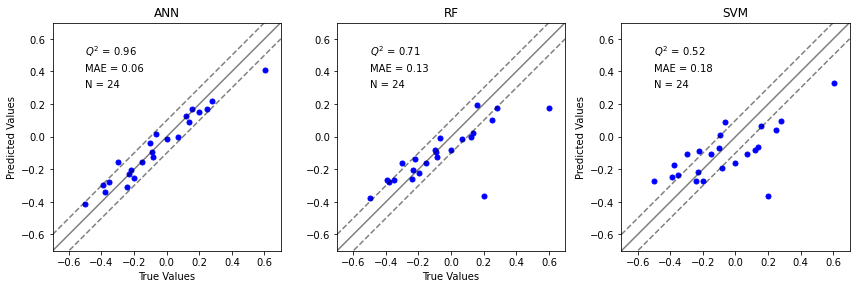

In [435]:
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#gs = gridspec.GridSpec(8, 8)

fig =  plt.figure()

ax1 = plt.subplot(1,3,1)
fig.set_size_inches(12,12)
ax1.scatter(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_ANN'], color = 'blue', s = 25)
test_MAE = mean_absolute_error(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_ANN'])
test_r = np.corrcoef(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_ANN'])
test_r_squared = test_r[0, 1]**2
test_N = len(MC_PFAS['PFAS_Pred_ANN'])
txt_x = -0.5
txt_y = 0.5
plt.text(txt_x, txt_y, r'$Q^2$ = %0.2f' % test_r_squared)
plt.text(txt_x, txt_y-0.1, 'MAE = %0.2f' % test_MAE)
plt.text(txt_x, txt_y-0.2, 'N = %0.0f' % test_N)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('ANN')
x = np.linspace(-0.7,0.7,100)
#plt.margins(0)
plt.ylim(-0.7, 0.7)
plt.xlim(-0.7, 0.7)
y1 = x
y2 = x + 0.1
y3 = x - 0.1
plt.plot(x, y1, '-', label='y=2x+1', color = 'black', alpha = 0.5)
plt.plot(x, y2, '--', label='y=2x+1', color = 'black', alpha = 0.5)
plt.plot(x, y3, '--', label='y=2x+1', color = 'black', alpha = 0.5)
ax1.set_aspect('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_RF'], color = 'blue', s = 25)
test_MAE = mean_absolute_error(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_RF'])
test_r = np.corrcoef(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_RF'])
test_r_squared = test_r[0, 1]**2
test_N = len(MC_PFAS['PFAS_Pred_SVM'])
txt_x = -0.5
txt_y = 0.5
plt.text(txt_x, txt_y, r'$Q^2$ = %0.2f' % test_r_squared)
plt.text(txt_x, txt_y-0.1, 'MAE = %0.2f' % test_MAE)
plt.text(txt_x, txt_y-0.2, 'N = %0.0f' % test_N)
plt.xlabel('True Values')
plt.title('RF')
x = np.linspace(-0.7,0.7,100)
#plt.margins(0)
plt.ylim(-0.7, 0.7)
plt.xlim(-0.7, 0.7)
y1 = x
y2 = x + 0.1
y3 = x - 0.1
plt.plot(x, y1, '-', label='y=2x+1', color = 'black', alpha = 0.5)
plt.plot(x, y2, '--', label='y=2x+1', color = 'black', alpha = 0.5)
plt.plot(x, y3, '--', label='y=2x+1', color = 'black', alpha = 0.5)

ax2.set_aspect('equal')

ax3 = plt.subplot(1,3,3)
ax3.scatter(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_SVM'], color = 'blue', s = 25)
test_MAE = mean_absolute_error(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_SVM'])
test_r = np.corrcoef(MC_PFAS['Log C:M Ratio Non-Lipid Normalized'], MC_PFAS['PFAS_Pred_SVM'])
test_r_squared = test_r[0, 1]**2
test_N = len(MC_PFAS['PFAS_Pred_SVM'])
txt_x = -0.5
txt_y = 0.5
plt.text(txt_x, txt_y, r'$Q^2$ = %0.2f' % test_r_squared)
plt.text(txt_x, txt_y-0.1, 'MAE = %0.2f' % test_MAE)
plt.text(txt_x, txt_y-0.2, 'N = %0.0f' % test_N)
plt.ylabel('Predicted Values')
plt.title('SVM')
x = np.linspace(-0.7,0.7,100)
plt.margins(0)
plt.ylim(-0.7, 0.7)
plt.xlim(-0.7, 0.7)
y1 = x
y2 = x + 0.1
y3 = x - 0.1
plt.plot(x, y1, '-', label='y=2x+1', color = 'black', alpha = 0.5)
plt.plot(x, y2, '--', label='y=2x+1', color = 'black', alpha = 0.5)
plt.plot(x, y3, '--', label='y=2x+1', color = 'black', alpha = 0.5)
fig.tight_layout()
ax3.set_aspect('equal')


plt.savefig('True vs Pred 24 PFAS in MC_DB Feature Extracted.png', dpi = 300, bbox_inches = 'tight')

In [436]:
chem_space = pd.read_csv('PC_chemical_space_overlap.csv')

In [437]:
chem_space.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,dataset,INCHIKEY
0,4125,-3.894510,13.582523,7.021332,-7.749486,4.183849,-1.534062,2.211702,-1.744455,2.866514,...,-2.488230,4.749265,-0.133172,-6.234837,-4.651728,11.714811,-5.474276,4.978234,PFAS_DB,XNRZXOILDGQTLV-UHFFFAOYSA-N
1,5509,-7.341735,10.401551,0.966023,-4.744555,3.920031,-2.964956,-1.269553,-1.882849,-2.173292,...,-2.848488,1.497083,-0.421921,1.298179,-2.635664,0.746174,-1.480410,-1.795722,PFAS_DB,UTTWCYJNKJTMHO-UHFFFAOYSA-N
2,5499,-4.838095,11.383691,-10.433794,1.887574,0.714059,6.177605,-2.118876,1.797718,-5.570522,...,2.313929,-2.618502,-2.428586,1.093974,-3.110962,-3.088557,1.077258,4.070079,PFAS_DB,NNCXHBMOWOYOGO-UHFFFAOYSA-N
3,5534,-9.326114,12.344345,5.480614,17.746908,-4.265827,0.640212,4.724133,3.114753,3.898883,...,-2.003675,0.002072,4.224089,-4.429220,-6.101623,-2.530293,-1.192136,1.537634,PFAS_DB,SQRQSKUFTIVOLR-UHFFFAOYSA-N
4,5533,-4.981903,11.071882,1.482551,-5.724912,4.471799,-4.554011,-0.601118,-1.862090,-2.814036,...,-2.839072,0.901829,-0.786072,1.206983,-2.235262,-0.449308,-1.108958,-0.769865,PFAS_DB,HWOXABJDDCSHRS-UHFFFAOYSA-N


In [438]:
PFAS.head()

,DTXSID,PREFERRED_NAME_x,INCHIKEY_x,SMILES_x,MOLECULAR_FORMULA_x,AVERAGE_MASS_x,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,PFAS_Pred_ANN,PFAS_Pred_RF,PFAS_Pred_SVM
0,DTXSID80844621,"2,2,3-Trifluoro-3-(pentafluoroethoxy)propanoic...",XEZRGPDPHQWFHV-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)OC(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,14.554868,424,26,80,91,10.659722,3.270833,0.251776,0.142491,0.089628
1,DTXSID00844623,"Fluoro[1,1,2,2-tetrafluoro-2-(trifluoromethoxy...",GHVHGLNEHMMXAV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)OC(F)(F)F,C5H2F8O4,278.054,NaN,NaN,NaN,NaN,...,14.630660,512,24,84,92,10.909722,3.465278,0.310583,0.141400,0.039010
2,DTXSID60844624,Fluoro(heptafluoropropoxy)acetic acid,SOPKUPKNOTUECV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,14.554868,415,27,80,92,10.659722,3.277778,0.247388,0.130056,0.114916
3,DTXSID70845743,Trifluoroacetic acid--8-fluoro-6-[(piperidin-3...,HIRJPQZSAAXQMS-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCCNC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.458086,620,26,94,109,4.555556,3.972222,-0.155705,-0.116618,-0.216720
4,DTXSID30845744,Trifluoroacetic acid--8-fluoro-6-[(piperidin-4...,QSVWXQWXIQVXRP-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCNCC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.458086,620,26,94,109,4.555556,3.972222,-0.161853,-0.102934,-0.206134


In [439]:
chem_space.shape

(4292, 23)

In [440]:
PFAS.shape

(7986, 1841)

In [441]:
chem_overlap = pd.merge(PFAS, chem_space, left_on = 'INCHIKEY_x', right_on = 'INCHIKEY')
chem_overlap

,DTXSID,PREFERRED_NAME_x,INCHIKEY_x,SMILES_x,MOLECULAR_FORMULA_x,AVERAGE_MASS_x,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,dataset,INCHIKEY
0,DTXSID80844621,"2,2,3-Trifluoro-3-(pentafluoroethoxy)propanoic...",XEZRGPDPHQWFHV-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)OC(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,0.605208,1.100009,1.394754,2.447064,-0.842563,-1.763647,-0.409117,-0.104943,PFAS_DB,XEZRGPDPHQWFHV-UHFFFAOYSA-N
1,DTXSID00844623,"Fluoro[1,1,2,2-tetrafluoro-2-(trifluoromethoxy...",GHVHGLNEHMMXAV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)OC(F)(F)F,C5H2F8O4,278.054,NaN,NaN,NaN,NaN,...,-0.578612,0.431603,1.505568,4.378760,-1.806669,-2.862587,-0.738282,1.515039,PFAS_DB,GHVHGLNEHMMXAV-UHFFFAOYSA-N
2,DTXSID60844624,Fluoro(heptafluoropropoxy)acetic acid,SOPKUPKNOTUECV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,0.560196,0.848884,1.753633,2.605777,-0.587548,-1.718604,-0.505157,-0.053085,PFAS_DB,SOPKUPKNOTUECV-UHFFFAOYSA-N
3,DTXSID70845743,Trifluoroacetic acid--8-fluoro-6-[(piperidin-3...,HIRJPQZSAAXQMS-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCCNC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.468279,-0.355168,-1.601709,-3.709912,-3.170251,3.482735,2.962779,-6.642249,PFAS_DB,HIRJPQZSAAXQMS-UHFFFAOYSA-N
4,DTXSID30845744,Trifluoroacetic acid--8-fluoro-6-[(piperidin-4...,QSVWXQWXIQVXRP-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCNCC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.693947,-0.890179,-1.772967,-3.860135,-2.981525,3.855608,3.285264,-6.530991,PFAS_DB,QSVWXQWXIQVXRP-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4290,DTXSID001019143,8:2 fluorotelomer unsaturated carboxylic acid,WHZXTVOEGZRRJM-UPHRSURJSA-N,OC(=O)\C=C(/F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,C10H2F16O2,458.098,NaN,NaN,NaN,NaN,...,0.443791,0.379085,1.461431,1.253389,-0.843569,-0.614749,-0.875744,-0.533101,PFAS_DB,WHZXTVOEGZRRJM-UPHRSURJSA-N
4291,DTXSID801019228,"1,1,2,2,3,3,4,4,5,5,6,6-dodecafluorohexane-1-s...",SKZFCJKAAJTRQC-UHFFFAOYSA-N,[H]C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)S...,C6H2F12O3S,382.120,NaN,NaN,NaN,NaN,...,1.356774,-1.418606,-0.533755,-0.628747,-1.372952,-1.681943,0.767090,-0.469819,PFAS_DB,SKZFCJKAAJTRQC-UHFFFAOYSA-N
4292,DTXSID501019229,"1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8-hexadecafluoro...",DHYPEWXXSPZJNA-UHFFFAOYSA-N,[H]C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,C8H2F16O3S,482.140,NaN,NaN,NaN,NaN,...,1.271914,-1.496570,-0.796619,-0.576425,-1.454000,-1.381739,0.707432,-0.336390,PFAS_DB,DHYPEWXXSPZJNA-UHFFFAOYSA-N
4293,DTXSID201019244,"1,3-Dichloro-1,1,2,2-tetrafluoropropane",JMRCQLAMQGMJDF-UHFFFAOYSA-N,FC(F)(Cl)C(F)(F)CCl,C3H2Cl2F4,184.940,NaN,NaN,NaN,NaN,...,0.639848,2.916253,0.049326,-1.453353,1.682169,-1.739014,-0.080277,0.268425,PFAS_DB,JMRCQLAMQGMJDF-UHFFFAOYSA-N


In [442]:
chem_overlap['PFAS_Pred_ANN']

0       0.251776
1       0.310583
2       0.247388
3      -0.155705
4      -0.161853
          ...   
4290   -0.203177
4291   -0.107930
4292   -0.273393
4293    0.092531
4294   -0.212160
Name: PFAS_Pred_ANN, Length: 4295, dtype: float64

In [443]:
len(PFAS['PFAS_Pred_ANN']) - PFAS['PFAS_Pred_ANN'].count()

0

In [444]:
PFAS

,DTXSID,PREFERRED_NAME_x,INCHIKEY_x,SMILES_x,MOLECULAR_FORMULA_x,AVERAGE_MASS_x,C:M Ratio Master,C:M Ratio Lipid Normalized,Log C:M Ratio Lipid Normalized,C:M Ratio Non-Lipid Normalized,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,PFAS_Pred_ANN,PFAS_Pred_RF,PFAS_Pred_SVM
0,DTXSID80844621,"2,2,3-Trifluoro-3-(pentafluoroethoxy)propanoic...",XEZRGPDPHQWFHV-UHFFFAOYSA-N,OC(=O)C(F)(F)C(F)OC(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,14.554868,424,26,80,91,10.659722,3.270833,0.251776,0.142491,0.089628
1,DTXSID00844623,"Fluoro[1,1,2,2-tetrafluoro-2-(trifluoromethoxy...",GHVHGLNEHMMXAV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)OC(F)(F)F,C5H2F8O4,278.054,NaN,NaN,NaN,NaN,...,14.630660,512,24,84,92,10.909722,3.465278,0.310583,0.141400,0.039010
2,DTXSID60844624,Fluoro(heptafluoropropoxy)acetic acid,SOPKUPKNOTUECV-UHFFFAOYSA-N,OC(=O)C(F)OC(F)(F)C(F)(F)C(F)(F)F,C5H2F8O3,262.055,NaN,NaN,NaN,NaN,...,14.554868,415,27,80,92,10.659722,3.277778,0.247388,0.130056,0.114916
3,DTXSID70845743,Trifluoroacetic acid--8-fluoro-6-[(piperidin-3...,HIRJPQZSAAXQMS-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCCNC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.458086,620,26,94,109,4.555556,3.972222,-0.155705,-0.116618,-0.216720
4,DTXSID30845744,Trifluoroacetic acid--8-fluoro-6-[(piperidin-4...,QSVWXQWXIQVXRP-UHFFFAOYSA-N,OC(=O)C(F)(F)F.FC1=C2C=NC=CC2=CC(OC2CCNCC2)=C1,C16H16F4N2O3,360.309,NaN,NaN,NaN,NaN,...,7.458086,620,26,94,109,4.555556,3.972222,-0.161853,-0.102934,-0.206134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,DTXSID501019231,9:3Fluorotelomer carboxylate,UQXUUCPMHUZPSW-UHFFFAOYSA-N,CCOC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,C12H5F19O2,542.140,NaN,NaN,NaN,NaN,...,14.263121,2732,81,182,231,22.173611,6.583333,0.048172,-0.095535,-0.097824
7982,DTXSID201019244,"1,3-Dichloro-1,1,2,2-tetrafluoropropane",JMRCQLAMQGMJDF-UHFFFAOYSA-N,FC(F)(Cl)C(F)(F)CCl,C3H2Cl2F4,184.940,NaN,NaN,NaN,NaN,...,16.722452,82,12,42,46,6.375000,1.937500,0.092531,0.120855,-0.031206
7983,DTXSID201019268,"3-Chloro-1,1,1,2-tetrafluoropropane",JSECXTYNFBONSF-UHFFFAOYNA-N,FC(CCl)C(F)(F)F,C3H3ClF4,150.500,NaN,NaN,NaN,NaN,...,13.635086,63,8,34,35,5.423611,1.833333,0.234203,0.135515,-0.068722
7984,DTXSID401019638,"1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-Heptadecaflu...",DOZBMDQURDJHIU-UHFFFAOYSA-N,CN(CCOCCOCCOCCOCCOCCOCCOCCOCCO)S(=O)(=O)C(F)(F...,C27H40F17NO11S,909.650,NaN,NaN,NaN,NaN,...,9.373248,21100,105,278,327,28.173611,12.583333,-0.547262,-0.619546,-0.393531


In [445]:
np.max(PFAS['PFAS_Pred_ANN'])

0.625407127392

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 5.000e+00, 3.000e+00, 8.000e+00, 4.000e+00, 5.000e+00,
        7.000e+00, 2.100e+01, 1.900e+01, 2.200e+01, 3.700e+01, 1.520e+02,
        2.790e+02, 3.880e+02, 5.650e+02, 9.040e+02, 1.406e+03, 1.955e+03,
        1.391e+03, 5.390e+02, 1.370e+02, 7.700e+01, 4.600e+01, 1.000e+01]),
 array([-1.74018769, -1.66133453, -1.58248137, -1.50362821, -1.42477505,
        -1.34592189, -1.26706873, -1.18821557, -1.1093624 , -1.03050924,
        -0.95165608, -0.87280292, -0.79394976, -0.7150966 , -0.63624344,
        -0.55739028, -0.47853712, -0.39968396, -0.3208308 , -0.24197764,
        -0.16312448, -0.08427132, -0.00541816,  0.073435  ,  0.15228816,
         0.23114132,  0.30999449,  0.38884765,  0.46770081,  0.54655397,
         0.62540713]),
 <BarContainer object of 30 artists>)

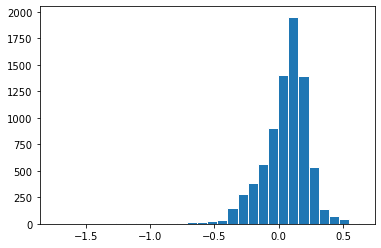

In [446]:
plt.hist(PFAS['PFAS_Pred_ANN'], bins = 30, edgecolor='white')

In [447]:
PFAS['PFAS_Pred_ANN'].unique

<bound method Series.unique of 0       0.251776
1       0.310583
2       0.247388
3      -0.155705
4      -0.161853
          ...   
7981    0.048172
7982    0.092531
7983    0.234203
7984   -0.547262
7985   -0.212160
Name: PFAS_Pred_ANN, Length: 7986, dtype: float64>

In [448]:
count_nan = len(PFAS.PFAS_Pred_ANN) - PFAS.PFAS_Pred_ANN.count()
count_nan

0

C:\Users\Adi\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


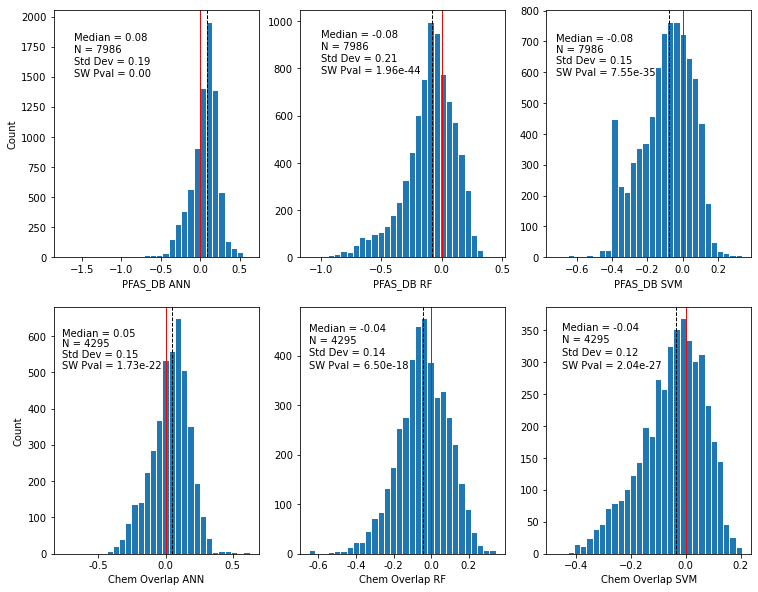

In [449]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


fig =  plt.figure()
fig.set_size_inches(12.5,10)

ax = plt.subplot(2,3,1)
plt.hist(PFAS['PFAS_Pred_ANN'], bins = 30, edgecolor='white')
median = np.median(PFAS['PFAS_Pred_ANN'])
N = len(PFAS['PFAS_Pred_ANN'])
std_dev = np.std(PFAS['PFAS_Pred_ANN'])
stat, pval = stats.shapiro(PFAS['PFAS_Pred_ANN'])
txt_x = -1.6
txt_y = 1800
plt.text(txt_x, txt_y, r'Median = %0.2f' % median)
plt.text(txt_x, txt_y-100, 'N = %0.0f' % N)
plt.text(txt_x, txt_y-200, 'Std Dev = %0.2f' % std_dev)
plt.text(txt_x, txt_y-300, 'SW Pval = %0.2f' % pval)
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0, color='red', linestyle= 'solid', linewidth=1)
#fig.tight_layout()
plt.ylabel('Count')
plt.xlabel('PFAS_DB ANN')
#plt.xlim(-1,1)



ax = plt.subplot(2,3,2)
plt.hist(PFAS['PFAS_Pred_RF'], bins = 30, edgecolor='white')
median = np.median(PFAS['PFAS_Pred_RF'])
N = len(PFAS['PFAS_Pred_RF'])
std_dev = np.std(PFAS['PFAS_Pred_RF'])
stat, pval = stats.shapiro(PFAS['PFAS_Pred_RF'])
txt_x = -1
txt_y = 930
plt.text(txt_x, txt_y, r'Median = %0.2f' % median)
plt.text(txt_x, txt_y-50, 'N = %0.0f' % N)
plt.text(txt_x, txt_y-100, 'Std Dev = %0.2f' % std_dev)
plt.text(txt_x, txt_y-150, 'SW Pval = {:.2e}'.format(pval))
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0, color='red', linestyle= 'solid', linewidth=1)
#fig.tight_layout()
plt.xlabel('PFAS_DB RF')
#plt.xlim(-1,1)

ax = plt.subplot(2,3,3)
plt.hist(PFAS['PFAS_Pred_SVM'], bins = 30, edgecolor='white')
median = np.median(PFAS['PFAS_Pred_SVM'])
N = len(PFAS['PFAS_Pred_SVM'])
std_dev = np.std(PFAS['PFAS_Pred_SVM'])
stat, pval = stats.shapiro(PFAS['PFAS_Pred_SVM'])
txt_x = -0.72
txt_y = 700
plt.text(txt_x, txt_y, r'Median = %0.2f' % median)
plt.text(txt_x, txt_y-35, 'N = %0.0f' % N)
plt.text(txt_x, txt_y-70, 'Std Dev = %0.2f' % std_dev)
plt.text(txt_x, txt_y-110, 'SW Pval = {:.2e}'.format(pval))
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0, color='red', linestyle= 'solid', linewidth=1)
#fig.tight_layout()
plt.xlabel('PFAS_DB SVM')
#plt.xlim(-0.7,0.7)


ax = plt.subplot(2,3,4)
plt.hist(chem_overlap['PFAS_Pred_ANN'], bins = 30, edgecolor='white')
median = np.median(chem_overlap['PFAS_Pred_ANN'])
N = len(chem_overlap['PFAS_Pred_ANN'])
std_dev = np.std(chem_overlap['PFAS_Pred_ANN'])
stat, pval = stats.shapiro(chem_overlap['PFAS_Pred_ANN'])

txt_x = -0.77
txt_y = 600
plt.text(txt_x, txt_y, r'Median = %0.2f' % median)
plt.text(txt_x, txt_y-30, 'N = %0.0f' % N)
plt.text(txt_x, txt_y-60, 'Std Dev = %0.2f' % std_dev)
plt.text(txt_x, txt_y-90, 'SW Pval = {:.2e}'.format(pval))
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0, color='red', linestyle= 'solid', linewidth=1)
plt.xlabel('Chem Overlap ANN')
plt.ylabel('Count')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.xlim(-0.7,0.7)


ax = plt.subplot(2,3,5)
plt.hist(chem_overlap['PFAS_Pred_RF'], bins = 30, edgecolor='white')
median = np.median(chem_overlap['PFAS_Pred_RF'])
N = len(chem_overlap['PFAS_Pred_RF'])
std_dev = np.std(chem_overlap['PFAS_Pred_RF'])
stat, pval = stats.shapiro(chem_overlap['PFAS_Pred_RF'])
txt_x = -0.65
txt_y = 450
plt.text(txt_x, txt_y, r'Median = %0.2f' % median)
plt.text(txt_x, txt_y-25, 'N = %0.0f' % N)
plt.text(txt_x, txt_y-50, 'Std Dev = %0.2f' % std_dev)
plt.text(txt_x, txt_y-75, 'SW Pval = {:.2e}'.format(pval))
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0, color='red', linestyle= 'solid', linewidth=1)
#fig.tight_layout()
plt.xlabel('Chem Overlap RF')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.xlim(-0.7,0.7)

ax = plt.subplot(2,3,6)
plt.hist(chem_overlap['PFAS_Pred_SVM'], bins = 30, edgecolor='white')
median = np.median(chem_overlap['PFAS_Pred_SVM'])
N = len(chem_overlap['PFAS_Pred_SVM'])
std_dev = np.std(chem_overlap['PFAS_Pred_SVM'])
stat, pval = stats.shapiro(chem_overlap['PFAS_Pred_SVM'])
txt_x = -0.45
txt_y = 350
plt.text(txt_x, txt_y, r'Median = %0.2f' % median)
plt.text(txt_x, txt_y-20, 'N = %0.0f' % N)
plt.text(txt_x, txt_y-40, 'Std Dev = %0.2f' % std_dev)
plt.text(txt_x, txt_y-60, 'SW Pval = {:.2e}'.format(pval))
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0, color='red', linestyle= 'solid', linewidth=1)
#fig.tight_layout()
plt.xlabel('Chem Overlap SVM')
#plt.xlim(-0.7,0.7)

plt.savefig('PFAS Distribution PFAS_DB vs Chem Space Overlap Feature Extract.png', dpi = 300, bbox_inches = 'tight')